# Plots

In [123]:
import numpy as np
import astropy.units as u
from astropy.table import Table, QTable, join,vstack
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt


from astroquery.simbad import Simbad
from astropy.coordinates import Angle

from  astroquery.gaia import Gaia
import pandas as pd

Lee la MasterTable


In [142]:
MasterTable= Table.read('CatalogosRadio/Master_table.csv') #Leer tabla
#MasterTable.to_pandas()
MasterTable['logEddRatio']=MasterTable['logEddRatio']*(-1)
MasterTable['Upp_Lim_logEddRatio']=MasterTable['Upp_Lim_logEddRatio']*(-1)
MasterTable.write('CatalogosRadio/Master_table.csv', overwrite=True) 

In [143]:
MasterTable= Table.read('CatalogosRadio/Master_table.csv') 

<ipython-input-126-cf7f92f4dcdf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'No data'),
 Text(1, 0, 'Triple'),
 Text(2, 0, 'Jet+complex'),
 Text(3, 0, 'Core/core-jet'),
 Text(4, 0, 'Undetected'),
 Text(5, 0, 'One-side jete'),
 Text(6, 0, 'Doubled-lobed')]

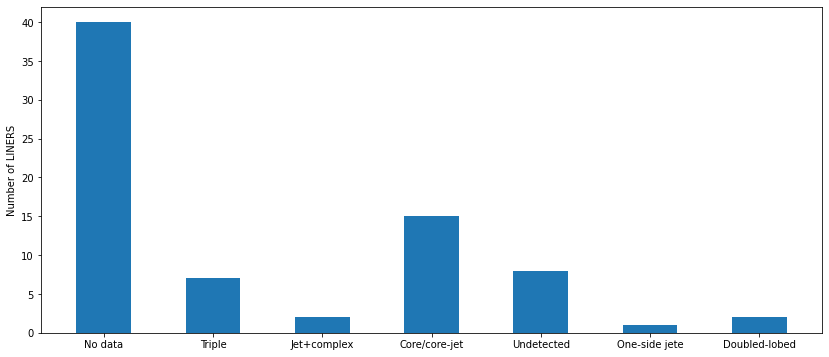

In [126]:
col1 = 'morph'

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
ax.hist(MasterTable[col1], bins=np.arange(0,7,0.5),align='left')   # histogram of column 1
labels = ['No data', 'Triple', 'Jet+complex','Core/core-jet','Undetected', 'One-side jete', 'Doubled-lobed']
ax.set_ylabel('Number of LINERS')
ax.set_xticklabels(labels)


Core/Core-jet  15
Oneside jet  1
Triple  7
Double-lobed  2
Jet complex  2
Undetected  8
No data  40


<ipython-input-127-97e0e78c84d2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


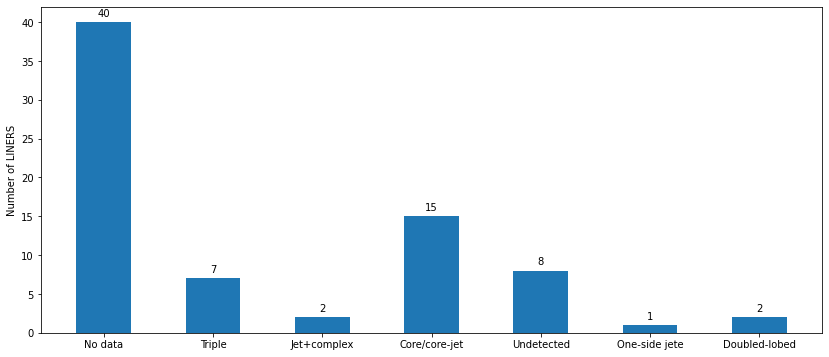

In [127]:
fig, ax = plt.subplots(figsize=(14,6))
ax.hist(MasterTable[col1], bins=np.arange(0,7,0.5),align='left')   

#TICKS
labels = ['No data', 'Triple', 'Jet+complex','Core/core-jet','Undetected', 'One-side jete', 'Doubled-lobed']
ax.set_ylabel('Number of LINERS')
ax.set_xticklabels(labels)

nd=0
triple=0
jetcomplex=0
core_corejet=0
und=0
onesidejet=0
dlobed=0

for i in MasterTable[col1]:
    if (i == "A"):
        core_corejet = core_corejet+1
    elif (i == "B"):
        onesidejet = onesidejet+1
    elif (i == "C"):
        triple = triple+1
    elif (i == "D"):
        dlobed = dlobed+1
    elif (i == "E"):
        jetcomplex = jetcomplex+1
    elif (i == "-"):
        und = und+1
    else:
        nd=nd+1

print ("Core/Core-jet ", (core_corejet))
print ("Oneside jet ", (onesidejet))  
print ("Triple ", (triple))
print ("Double-lobed ", (dlobed))
print ("Jet complex ", (jetcomplex))
print ("Undetected ", (und))
print ("No data ", (nd))

#Números encima
x = np.arange(len(labels))
width = 0.5
total= [nd, triple, jetcomplex,core_corejet, und, onesidejet,dlobed]
pps = ax.bar(x,total,0.5,align = 'center')
for p in pps:
    height = p.get_height()
    ax.text(x=(p.get_x() + p.get_width() / 2), y=height+0.75, s="{}".format(height), ha='center') 

Text(0, 0.5, 'Magnitud(V)')

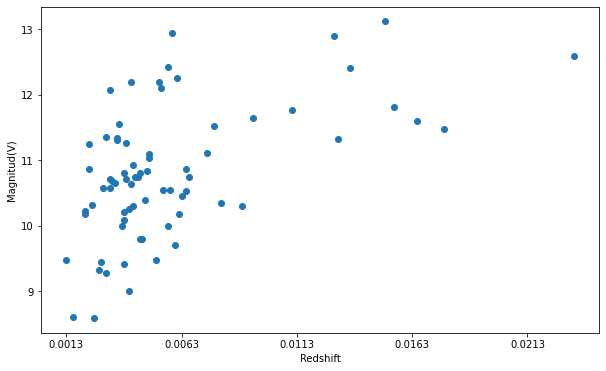

In [128]:
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(MasterTable['Redshift'],MasterTable['Magnitud(V)'],'o')
xmin = min(MasterTable['Redshift'])
xmax= max(MasterTable['Redshift'])
ticks = np.arange(xmin,xmax,0.005)
ax.set_xticks(ticks)
ax.set_xlabel('Redshift')
ax.set_ylabel('Magnitud(V)')
#ax.set_ylim(8,14)



<ipython-input-129-2fdbbf46ab37>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'No data'),
 Text(1, 0, 'L1.9'),
 Text(2, 0, 'S2/T2'),
 Text(3, 0, 'T2'),
 Text(4, 0, 'L2/T2'),
 Text(5, 0, 'L2'),
 Text(6, 0, 'L2/S2'),
 Text(7, 0, 'S1.9/L1.9'),
 Text(8, 0, 'S2'),
 Text(9, 0, 'T2/S2'),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, '')]

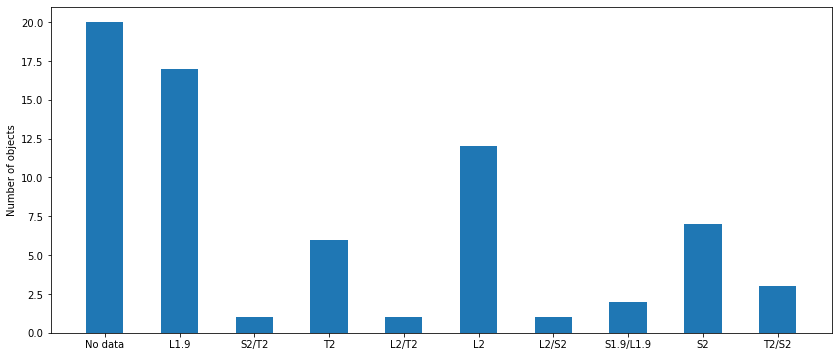

In [129]:
col = 'AType'

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
ax.hist(MasterTable[col], bins=np.arange(0,10,0.5), align='left')   # histogram of column 1
labels = ['No data', 'L1.9', 'S2/T2','T2','L2/T2', 'L2', 'L2/S2', 'S1.9/L1.9', 'S2', 'T2/S2']
ax.set_ylabel('Number of objects')
ax.set_xticklabels(labels)

In [117]:
#MasterTable=MasterTable.to_pandas()

In [118]:
#MasterTable['log(Ltotal)']=MasterTable['log(Ltotal)'].astype(str)


    

<ipython-input-130-172fc1a0d0ba>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(33.0, 0, ''),
 Text(34.0, 0, '34-35'),
 Text(35.0, 0, '35-36'),
 Text(36.0, 0, '36-37'),
 Text(37.0, 0, '37-38'),
 Text(38.0, 0, '38-39'),
 Text(39.0, 0, '39-40'),
 Text(40.0, 0, '')]

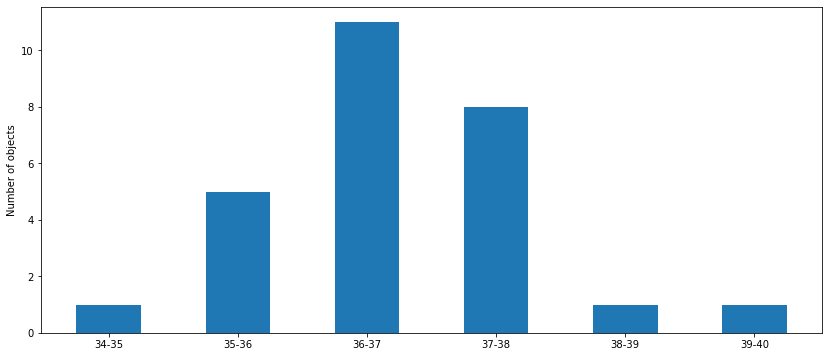

In [130]:
col = 'log(Ltotal)'

MasterTable['log(Ltotal)']=MasterTable['log(Ltotal)'].astype(float)

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
Y,bins= np.histogram(MasterTable[col], bins=np.arange(34,41,1))   # histogram of column 1
#labels = ['No data', 'L1.9', 'S2/T2','T2','L2/T2', 'L2', 'L2/S2', 'S1.9/L1.9', 'S2', 'T2/S2']
ax.bar(bins[:-1],Y,width=0.5)
ax.set_ylabel('Number of objects')
labels = ['','34-35','35-36','36-37', '37-38','38-39','39-40']
ax.set_xticklabels(labels)

El siguiente gráfico no es correcto porque logEdd es una string.

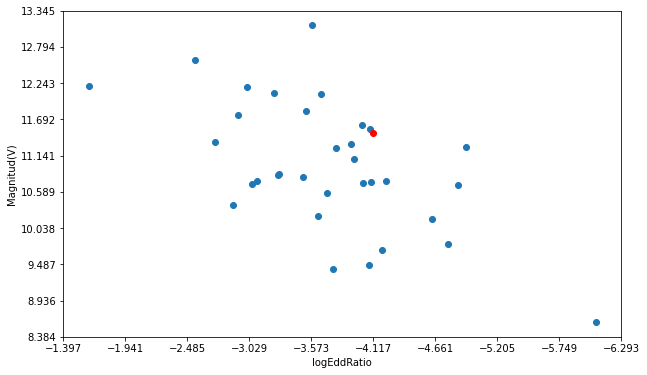

In [151]:

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(MasterTable['logEddRatio'],MasterTable['Magnitud(V)'])
ax.scatter(MasterTable['Upp_Lim_logEddRatio'],MasterTable['Magnitud(V)'], color='red')
ax.set_xlabel('logEddRatio')
ax.invert_xaxis()
xmin,xmax= ax.get_xlim()
ax.set_xticks(np.linspace(xmin,xmax,10))
ax.set_ylabel('Magnitud(V)')
ymin,ymax= ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))

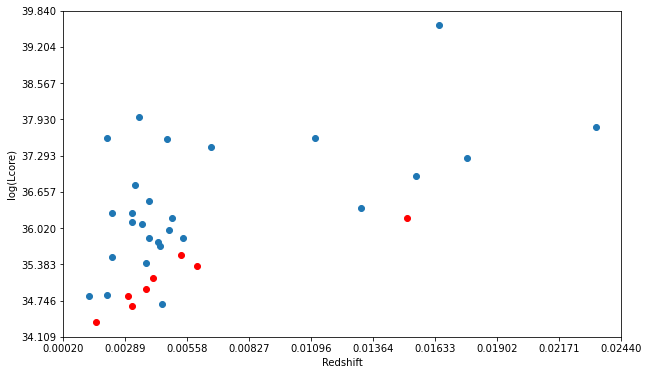

In [148]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(MasterTable['Redshift'],MasterTable['log(Lcore)'])
ax.scatter(MasterTable['Redshift'],MasterTable['Upp_Lim_log(Lcore)'], color='red')
ax.set_xlabel('Redshift')
xmin,xmax= ax.get_xlim()
ax.set_xticks(np.linspace(xmin,xmax,10))
ax.set_ylabel('log(Lcore)')
ymin,ymax= ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))